In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df_raw = pd.read_csv("2017_jun_final.csv")

In [52]:
df_raw.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [53]:
df_raw.shape

(8704, 25)

In [54]:
df_raw.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [55]:
df_raw.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

In [56]:
df_raw.isnull().any() | df_raw.columns.isin(['Язык.программирования'])

N                                   False
Должность                           False
Язык.программирования                True
Специализация                        True
Общий.опыт.работы                   False
Опыт.работы.на.текущем.месте        False
Зарплата.в.месяц                    False
Изменение.зарплаты.за.12.месяцев    False
Город                               False
Размер.компании                     False
Тип.компании                        False
Пол                                 False
Возраст                             False
Образование                         False
Университет                          True
Еще.студент                         False
Уровень.английского                 False
Предметная.область                   True
Дата.заполнения                     False
User.Agent                          False
exp                                 False
current_job_exp                     False
salary                              False
Валюта                            

In [57]:
df_col_na = df_raw.loc[:, (~df_raw.isnull().any() | df_raw.columns.isin(['Язык.программирования']))]

In [58]:
df_col_na.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

In [59]:
df_no_na = df_col_na.dropna()

In [60]:
df_no_na.shape

(4854, 20)

In [61]:
python_data = df_no_na[df_no_na["Язык.программирования"]=="Python"]
python_data["Язык.программирования"].unique()

array(['Python'], dtype=object)

In [62]:
python_data.shape

(207, 20)

In [63]:
df_position = python_data.groupby(["Должность"])

In [64]:
df_position.agg({"Зарплата.в.месяц": ["min", "max"]})

Зарплата.в.месяц      
                                      min   max
Должность                                      
Junior Software Engineer              100  1250
Senior Software Engineer             1300  9200
Software Engineer                     500  5400
System Architect                     3000  5000
Technical Lead                       1425  6200

In [65]:
def fill_avg_salary(position, df):
    
    mean_table = df.agg({"Зарплата.в.месяц": ["mean"]})
    result = float(mean_table.loc[position].values[0])
    return result
    
python_data["avg"] = python_data["Должность"].apply(fill_avg_salary, args=(df_position, ))
python_data.head(10)

C:\Users\dgoub\AppData\Local\Temp\ipykernel_14568\2462362884.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  python_data["avg"] = python_data["Должность"].apply(fill_avg_salary, args=(df_position, ))


,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,...,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary,avg
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,...,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.00,0.00,800,1799.07000
68,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,...,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.50,0.50,900,1799.07000
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,...,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.50,0.50,600,560.84127
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,...,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.50,0.50,685,560.84127
143,144,Junior Software Engineer,Python,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,...,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.00,1.00,750,560.84127
153,154,Software Engineer,Python,2,1,1200,0,Днепр,до 50 человек,Аутстаффинговая,...,34,Кандидат,False,продвинутый,12/06/2017 13:20:15,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,2.00,1.00,1200,1799.07000
162,163,Junior Software Engineer,Python,0.5,0.5,500,0,Винница,до 200 человек,Аутсорсинговая,...,20,Техникум / Колледж,True,ниже среднего,12/06/2017 13:21:08,Mozilla/5.0 (Linux; Android 7.1.2; LG-D802 Bui...,0.50,0.50,500,560.84127
171,172,Junior Software Engineer,Python,0.25,0.25,800,0,Киев,до 50 человек,Продуктовая,...,25,Высшее,False,продвинутый,12/06/2017 13:22:31,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.25,0.25,800,560.84127
217,218,Software Engineer,Python,8,2,2900,150,Львов,до 1000 человек,Аутсорсинговая,...,26,Высшее,False,выше среднего,12/06/2017 13:31:50,Mozilla/5.0 (Windows NT 6.2; Win64; x64) Apple...,8.00,2.00,2900,1799.07000
283,284,Junior Software Engineer,Python,1,меньше 3 месяцев,400,400,Харьков,до 10 человек,Стартап,...,23,Незаконченное высшее,False,средний,12/06/2017 13:43:33,Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537....,1.00,0.00,400,560.84127


C:\Users\dgoub\AppData\Local\Temp\ipykernel_14568\559723551.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  python_data["Общий.опыт.работы"] = python_data["Общий.опыт.работы"].astype(float)


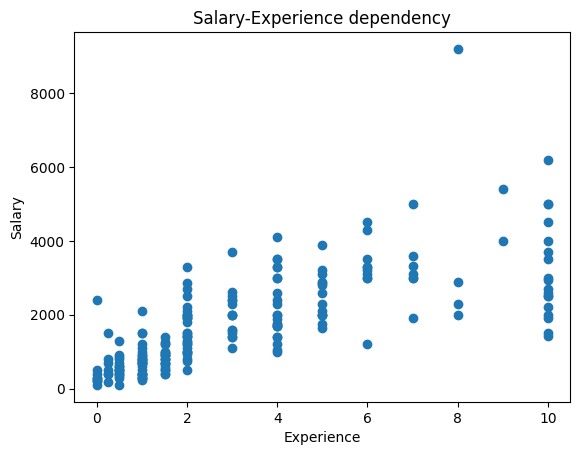

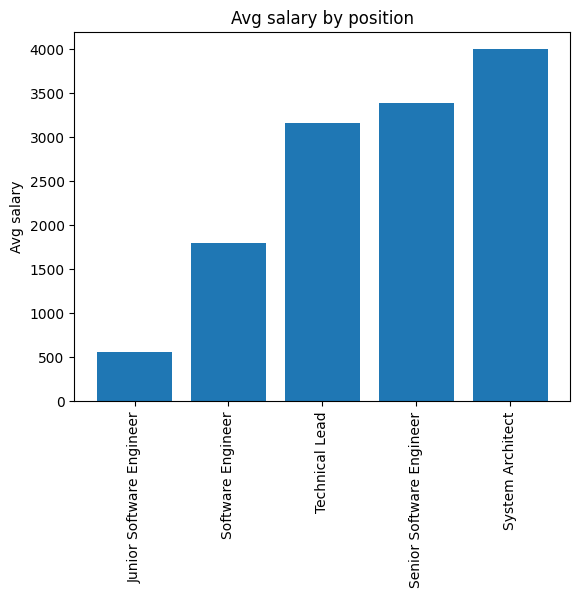

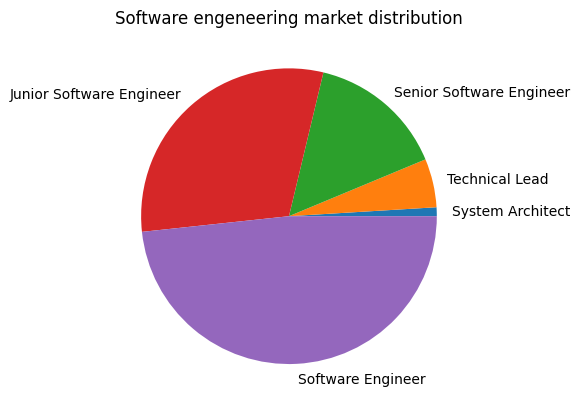

In [107]:
# python_data.plot("Общий.опыт.работы", "Зарплата.в.месяц")
python_data["Общий.опыт.работы"].unique()
python_data.loc[python_data['Общий.опыт.работы'] == '10 и более лет', 'Общий.опыт.работы'] = "10"
python_data.loc[python_data['Общий.опыт.работы'] == 'меньше 3 месяцев', 'Общий.опыт.работы'] = "0"
python_data["Общий.опыт.работы"] = python_data["Общий.опыт.работы"].astype(float)
python_data["Общий.опыт.работы"].unique()
plt.scatter(python_data["Общий.опыт.работы"], python_data["Зарплата.в.месяц"])
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Salary-Experience dependency")
plt.show()


df_sorted= python_data.sort_values('avg')
plt.figure()
plt.bar(df_sorted["Должность"], df_sorted["avg"])
plt.ylabel("Avg salary")
plt.title("Avg salary by position")
plt.xticks(rotation=90)
plt.show()


df_count = python_data.groupby(["Должность"])["Должность"].count().sort_values()
plt.pie(df_count, labels=df_count.keys())
plt.title("Software engeneering market distribution")
plt.show()



In [49]:
python_data["avg"].describe()

KeyError: 'avg'

In [18]:
python_data.to_csv("developers_info.csv", encoding="utf-16")